# Linear Regression

Another Example for Linear Regression.
Dataset : homeprices.csv

## Steps in SLR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # This will suppress all warnings

In [7]:
data=pd.read_csv('data/homeprices.csv')
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Data Preprocessing

In [9]:
data.describe

<bound method NDFrame.describe of    area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [11]:
data.columns

Index(['area', 'price'], dtype='object')

In [12]:
data.size

10

In [13]:
data.shape

(5, 2)

In [14]:
data.dtypes

area     int64
price    int64
dtype: object

In [15]:
data.isna().sum()

area     0
price    0
dtype: int64

In [16]:
data.duplicated().sum()

0

### Correlation Analysis

In [18]:
data.corr()

,area,price
area,1.000000,0.978994
price,0.978994,1.000000


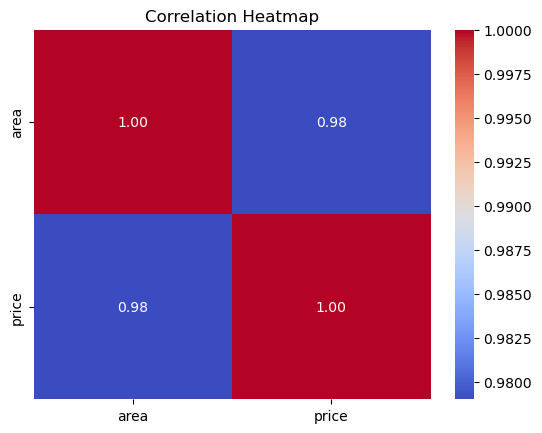

In [19]:
# correlation analysis
correlation_matrix = data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data Visualization

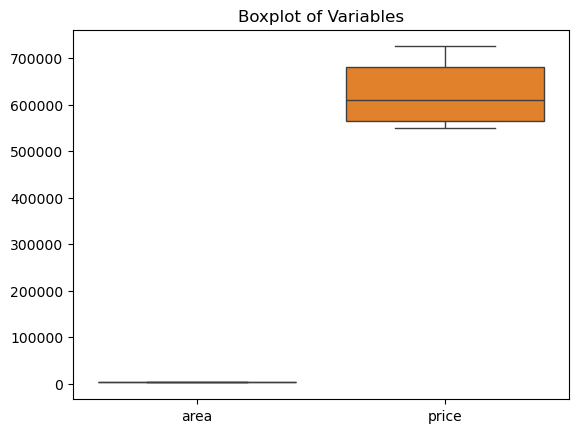

In [21]:
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

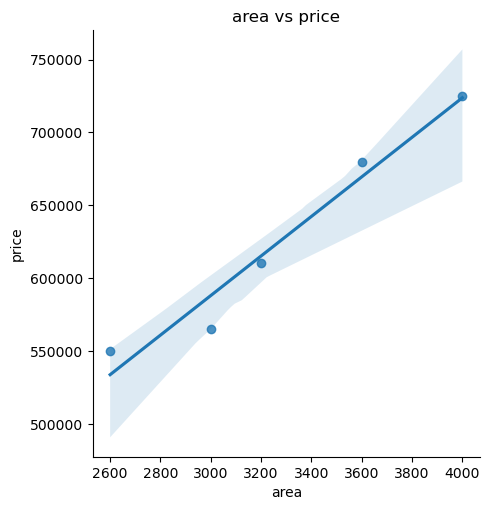

In [22]:
sns.lmplot(x='area', y='price', data=data)
plt.title('area vs price')
plt.show()

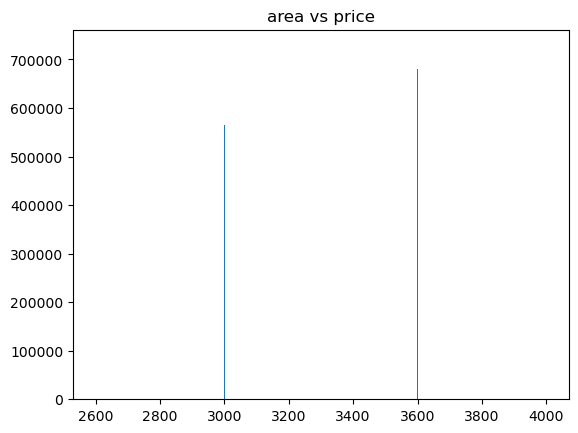

In [23]:
plt.bar(data['area'], data['price'])
plt.title('area vs price')
plt.show()

### Spliting the Data into Input(X) & Target(Y) variables

In [25]:
X = data.iloc[:, :1].values  # Extracts the first column, 'area'
Y = data.iloc[:, 1].values   # Extracts the second column, 'price'

# Y=data['price']           #you can use this method too

### Spliting data into test data & train data

In [27]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

### Linear Regression Modeling

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr=LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

### Predictions

In [94]:
y_pred=lr.predict(x_test)
y_pred

array([616315.78947368, 724210.52631579])

### Model Coefficients and Intercept

In [96]:
print("Coefficient:",lr.coef_) #m
print("Intercept:",lr.intercept_) #C

Coefficient: [134.86842105]
Intercept: 184736.8421052632


### Visualization of Actual & Predicted Values

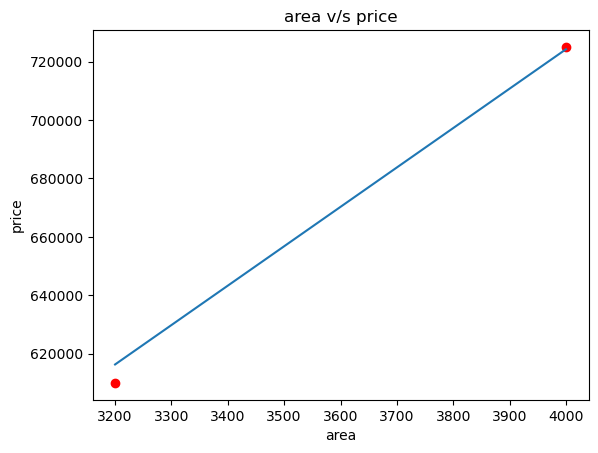

In [98]:
plt.scatter(x_test, y_test, color='red')
plt.title('area v/s price')
plt.xlabel('area')
plt.ylabel('price')

plt.plot(x_test,y_pred)
plt.show()

### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3552.631578947301
20256232.68698084
4500.692467496623


### Creating DataFrame to view Results

In [102]:
Results=pd.DataFrame(columns=['Actual_Price','Predicted_Price','area'])
Results['Actual_Salary']=y_test
Results['Predicted_Salary']=y_pred
Results['area']=x_test
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

,index,Actual_Price,Predicted_Price,area,Actual_Salary,Predicted_Salary,Id
0,0,NaN,NaN,3200,610000,616315.789474,0
1,1,NaN,NaN,4000,725000,724210.526316,1


### r2 value calculations

The 
𝑅
2
  value, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (predictors) in a regression model.

In the context of Multiple Linear Regression (MLR), the 
𝑅
2
  value indicates how well the model fits the data and how much of the variability in the dependent variable can be explained by the independent variables.

In [105]:
from sklearn.metrics import r2_score

In [106]:
r2=r2_score(y_test,y_pred)
r2

0.9938733511721797

### Conclusion

R-squared (0.99): The R-squared value of 0.99 indicates that the model explains 99% of the variance in the predicted salary values based on the area feature (or whatever features are included in the model). This is excellent performance and suggests a very strong fit of the model to the data.


Model Performance: The model might be overfitting, or the data might need cleaning and more context for better performance.

In [110]:
# END